In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

In [88]:
H = np.array([51, 72, 86, 99, 114, 127, 144, 151, 163])*0.01 # mT
Hpp = H*2*np.sqrt(2)*10 # gauss
p = 5 # V

In [89]:
def straight_line(x, m, c): return m*x+c

def plotting_function(xs, ys, xlabel='', ylabel='', plot_shape='k*', round_to=4, tex_pos=(0.55, 0.15), legend_pos='best'):
    popt, pcov = curve_fit(f=straight_line, xdata=xs, ydata=ys)

    text = f"If the Equation is y = mx + c\nFor the best fit curve: \n"
    text += f"    m = {format(popt[0], '.5g')} ± {format(pcov[0][0]**0.5, '.4g')}\n"
    text += f"    c = {format(popt[1], '.4g')} ± {format(pcov[1][1]**0.5, '.4g')}\n"
    print(text)
    print("The curve looks like:")

    span = max(xs) - min(xs)
    a = 0.05
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.figure(figsize=(8,6))
    plt.plot(xs, ys, plot_shape, label='Data Points') 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), '--k', label='Least-square Fit')

    plt.legend(loc=legend_pos)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.minorticks_on()

    plt.text(tex_pos[0], tex_pos[1], text, fontsize=12, transform=plt.gcf().transFigure)
    
    return popt[0], pcov[0][0]**0.5

# 13.03 MHz

In [90]:
f1 = 13.03*1e6
i1 = np.array([99, 126, 153, 180, 207, 230, 257, 282, 307])
q1 = np.array([32, 24, 18, 16, 14, 12, 11, 10, 9])*0.1/2 # V
q1, Hpp

(array([1.6 , 1.2 , 0.9 , 0.8 , 0.7 , 0.6 , 0.55, 0.5 , 0.45]),
 array([14.42497834, 20.3646753 , 24.32447327, 28.00142853, 32.24406922,
        35.92102448, 40.7293506 , 42.70924958, 46.10336213]))

If the Equation is y = mx + c
For the best fit curve: 
    m = 0.049694 ± 0.001598
    c = -0.1332 ± 0.05311

The curve looks like:


Text(0, 0.5, '$1/Q$ ($V^{-1}$)')

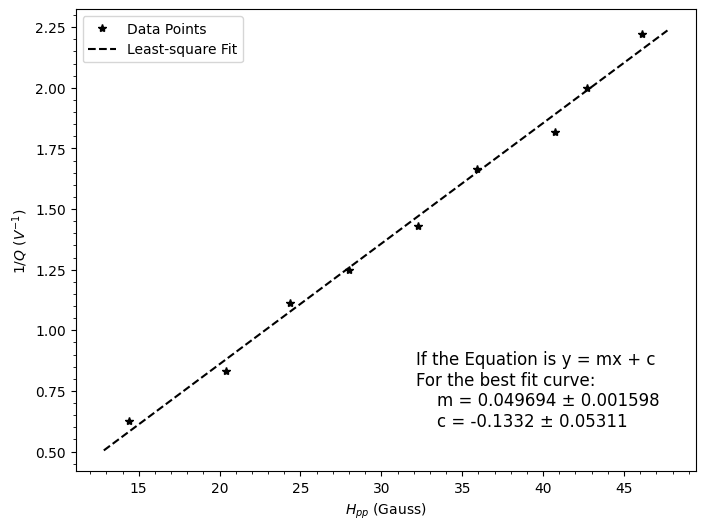

In [91]:
slope1 = plotting_function(Hpp, 1/q1)
plt.xlabel(r'$H_{pp}$ (Gauss)')
plt.ylabel(r'$1/Q$ ($V^{-1}$)')

In [92]:
H0_1 = 1/(slope1[0]*p)
g1 = (6.626*1e-27*f1)/(H0_1*0.927*1e-20)
H0_1, g1

(4.024616529079115, 2.314150536640181)

In [93]:
err_H0 = H0_1*np.sqrt((slope1[1]/slope1[0])**2 + (0.2/p)**2)
err_g = g1*np.sqrt((1e4/f1)**2 + (err_H0/H0_1)**2)
err_H0, err_g

(0.20656586847165942, 0.1187884481758661)

In [94]:
table1 = np.array([i1, q1*2, q1, H, np.round(Hpp, 2)]).transpose()
print(tabulate(table1, tablefmt="latex"))

\begin{tabular}{rrrrr}
\hline
  99 & 3.2 & 1.6  & 0.51 & 14.42 \\
 126 & 2.4 & 1.2  & 0.72 & 20.36 \\
 153 & 1.8 & 0.9  & 0.86 & 24.32 \\
 180 & 1.6 & 0.8  & 0.99 & 28    \\
 207 & 1.4 & 0.7  & 1.14 & 32.24 \\
 230 & 1.2 & 0.6  & 1.27 & 35.92 \\
 257 & 1.1 & 0.55 & 1.44 & 40.73 \\
 282 & 1   & 0.5  & 1.51 & 42.71 \\
 307 & 0.9 & 0.45 & 1.63 & 46.1  \\
\hline
\end{tabular}


# 14.01 MHz

In [95]:
f1 = 14.01*1e6
i1 = np.array([99, 127, 154, 184, 209, 233, 258, 282, 307])
q1 = np.array([34, 26, 20, 17, 15, 13, 11, 10, 9])*0.1/2 # V
q1, Hpp

(array([1.7 , 1.3 , 1.  , 0.85, 0.75, 0.65, 0.55, 0.5 , 0.45]),
 array([14.42497834, 20.3646753 , 24.32447327, 28.00142853, 32.24406922,
        35.92102448, 40.7293506 , 42.70924958, 46.10336213]))

If the Equation is y = mx + c
For the best fit curve: 
    m = 0.05168 ± 0.002254
    c = -0.2526 ± 0.0749

The curve looks like:


Text(0, 0.5, '$1/Q$ ($V^{-1}$)')

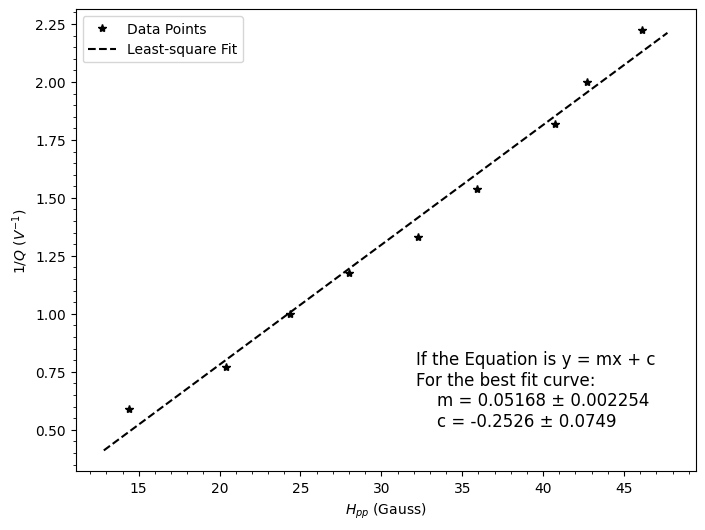

In [96]:
slope1 = plotting_function(Hpp, 1/q1)
plt.xlabel(r'$H_{pp}$ (Gauss)')
plt.ylabel(r'$1/Q$ ($V^{-1}$)')

In [97]:
H0_1 = 1/(slope1[0]*p)
g1 = (6.626*1e-27*f1)/(H0_1*0.927*1e-20)
H0_1, g1

(3.8699879322232613, 2.587618347993743)

In [98]:
err_H0 = H0_1*np.sqrt((slope1[1]/slope1[0])**2 + (0.2/p)**2)
err_g = g1*np.sqrt((1e4/f1)**2 + (err_H0/H0_1)**2)
err_H0, err_g

(0.22903298128931512, 0.15315113567591526)

In [99]:
table1 = np.array([i1, q1*2, q1, H, np.round(Hpp, 2)]).transpose()
print(tabulate(table1, tablefmt="latex"))

\begin{tabular}{rrrrr}
\hline
  99 & 3.4 & 1.7  & 0.51 & 14.42 \\
 127 & 2.6 & 1.3  & 0.72 & 20.36 \\
 154 & 2   & 1    & 0.86 & 24.32 \\
 184 & 1.7 & 0.85 & 0.99 & 28    \\
 209 & 1.5 & 0.75 & 1.14 & 32.24 \\
 233 & 1.3 & 0.65 & 1.27 & 35.92 \\
 258 & 1.1 & 0.55 & 1.44 & 40.73 \\
 282 & 1   & 0.5  & 1.51 & 42.71 \\
 307 & 0.9 & 0.45 & 1.63 & 46.1  \\
\hline
\end{tabular}


# 15.02 MHz

In [100]:
f1 = 15.02*1e6
i1 = np.array([98, 126, 153, 181, 208, 234, 261, 284, 307])
q1 = np.array([36, 28, 22, 18, 16, 14, 12, 11, 10])*0.1/2 # V
q1, Hpp

(array([1.8 , 1.4 , 1.1 , 0.9 , 0.8 , 0.7 , 0.6 , 0.55, 0.5 ]),
 array([14.42497834, 20.3646753 , 24.32447327, 28.00142853, 32.24406922,
        35.92102448, 40.7293506 , 42.70924958, 46.10336213]))

If the Equation is y = mx + c
For the best fit curve: 
    m = 0.046229 ± 0.001662
    c = -0.1904 ± 0.05524

The curve looks like:


Text(0, 0.5, '$1/Q$ ($V^{-1}$)')

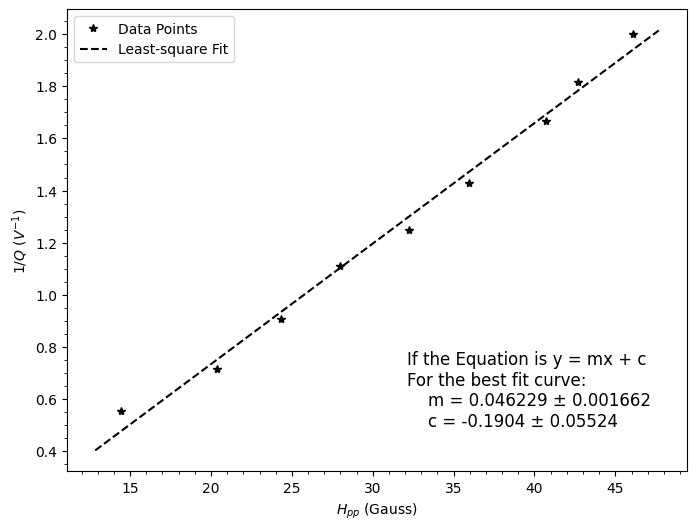

In [101]:
slope1 = plotting_function(Hpp, 1/q1)
plt.xlabel(r'$H_{pp}$ (Gauss)')
plt.ylabel(r'$1/Q$ ($V^{-1}$)')

In [102]:
H0_1 = 1/(slope1[0]*p)
g1 = (6.626*1e-27*f1)/(H0_1*0.927*1e-20)
H0_1, g1

(4.326312438945424, 2.4815541125467027)

In [103]:
err_H0 = H0_1*np.sqrt((slope1[1]/slope1[0])**2 + (0.2/p)**2)
err_g = g1*np.sqrt((1e4/f1)**2 + (err_H0/H0_1)**2)
err_H0, err_g

(0.23270686517139705, 0.13348987647306318)

In [104]:
table1 = np.array([i1, q1*2, q1, H, np.round(Hpp, 2)]).transpose()
print(tabulate(table1, tablefmt="latex"))

\begin{tabular}{rrrrr}
\hline
  98 & 3.6 & 1.8  & 0.51 & 14.42 \\
 126 & 2.8 & 1.4  & 0.72 & 20.36 \\
 153 & 2.2 & 1.1  & 0.86 & 24.32 \\
 181 & 1.8 & 0.9  & 0.99 & 28    \\
 208 & 1.6 & 0.8  & 1.14 & 32.24 \\
 234 & 1.4 & 0.7  & 1.27 & 35.92 \\
 261 & 1.2 & 0.6  & 1.44 & 40.73 \\
 284 & 1.1 & 0.55 & 1.51 & 42.71 \\
 307 & 1   & 0.5  & 1.63 & 46.1  \\
\hline
\end{tabular}
